In [6]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import geopandas as gpd
from shapely import vectorized
import xarray as xr

/tmp/ipykernel_1742582/590470034.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  korea = gdf_borders[gdf_borders['SOVEREIGNT'].isin(['South Korea'])].geometry.unary_union
/tmp/ipykernel_1742582/590470034.py:20: RuntimeWarning: All-NaN slice encountered
  monthly_max = np.array([np.nanmax(daily_max[month * 30:(month + 1) * 30], axis=0) for month in range(12)])


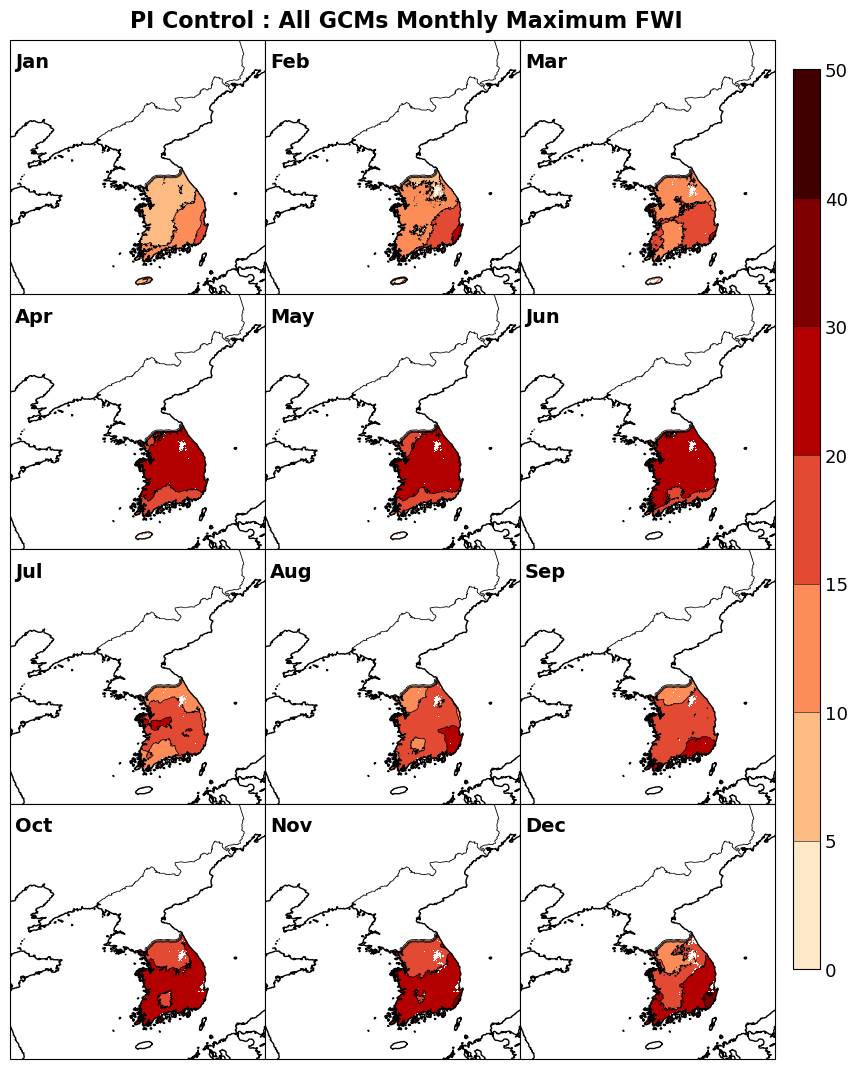

In [ ]:

data_type = "picontrol" 

data_type_title = "PI Control" if data_type == "picontrol" else "Historical"
title = f"{data_type_title} : All GCMs Monthly Maximum FWI"

# üìå Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data_dir = f"../result/HR/{data_type}"
daily_max = np.load(f"{data_dir}/all_gcm_fwi.npy")  # (365 or 366, 601, 601)

shapefile_path = "./shape_files/ne_10m_admin_0_countries.shp"
gdf_borders = gpd.read_file(shapefile_path)
korea = gdf_borders[gdf_borders['SOVEREIGNT'].isin(['South Korea'])].geometry.unary_union

lon = np.load("../../data/ISIMIP_ko_lon_2km.npy")  # (601,)
lat = np.load("../../data/ISIMIP_ko_lat_2km.npy")  # (601,)

lon_grid, lat_grid = np.meshgrid(lon, lat)
mask = vectorized.contains(korea, lon_grid, lat_grid)

# üìå ÏõîÎ≥Ñ ÏµúÎåÄÍ∞í Í≥ÑÏÇ∞
monthly_max = np.array([np.nanmax(daily_max[month * 30:(month + 1) * 30], axis=0) for month in range(12)])

# üìå ÏÉâÏÉÅ Î∞è Í≤ΩÍ≥Ñ ÏÑ§Ï†ï
bounds = [0, 5, 10, 15, 20, 30, 40, 50]
colors = ["#fee8c8", "#fdbb84", "#fc8d59", "#e34a33", "#b30000", "#7f0000", "#400000"]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# üìå ÏßÄÎèÑ ÏÑ§Ï†ï
fig, axes = plt.subplots(4, 3, figsize=(9, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0, right=0.85, top=1, bottom=0, hspace=-0.415, wspace=0)  # üîπ ÏÑ∏Î°ú/Í∞ÄÎ°ú Í∞ÑÍ≤© ÏôÑÏ†Ñ Ï†úÍ±∞

month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i, ax in enumerate(axes.flat):
    if i < 12:  # 12Í∞úÏõîÍπåÏßÄÎßå Í∑∏Î¶¨Í∏∞
        monthly_max[i] = np.where(mask, np.flipud(monthly_max[i]), np.nan)
        c = ax.pcolormesh(lon, lat, monthly_max[i], cmap=cmap, norm=norm, shading="auto")

        # üîπ ÏßÄÎèÑ Ïä§ÌÉÄÏùº Ï°∞Ï†ï
        ax.coastlines(color="black", linewidth=1.0)
        ax.add_feature(cfeature.BORDERS, linestyle="-", edgecolor="black", linewidth=0.6)
        
        ax.contour(lon, lat, monthly_max[i], levels=bounds, colors='black', linewidths=0.5)

        # üîπ X, Y ÎùºÎ≤® Ï†úÍ±∞ÌïòÍ≥† Ïõî Ïù¥Î¶ÑÎßå ÎÇ®Í∏∞Í∏∞
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(0.02, 0.95, month_labels[i], transform=ax.transAxes, fontsize=14, fontweight="bold", va="top", ha="left")
    else:
        ax.axis("off")  # ÎÇ®ÏùÄ Îπà Í≥µÍ∞Ñ Ï†úÍ±∞


# üìå Ïª¨Îü¨Î∞î Ï∂îÍ∞Ä (Ïò§Î•∏Ï™Ω Î∞∞Ïπò, Ï†úÎ™©Í≥º Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù Ï°∞Ï†ï)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.75])  # (left, bottom, width, height)
cbar = fig.colorbar(c, cax=cbar_ax, orientation="vertical", ticks=bounds, drawedges=True)
# cbar.set_label("FWI Max", fontsize=13, fontweight="bold")

# üìå Ïª¨Îü¨Î∞î Ìè∞Ìä∏ ÌÅ¨Í∏∞ Î∞è ÎààÍ∏à Ï°∞Ï†ï
cbar.ax.tick_params(size=0, width=0, labelsize=13)
cbar.ax.yaxis.set_tick_params(width=1.5)

plt.suptitle(title, fontsize=16, fontweight="bold", x=0.44, y=0.95)
plt.savefig(f"./figs/{data_type}_all_gcms_monthly_max_FWI.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_1742582/4278154432.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  korea = gdf_borders[gdf_borders['SOVEREIGNT'].isin(['South Korea'])].geometry.unary_union


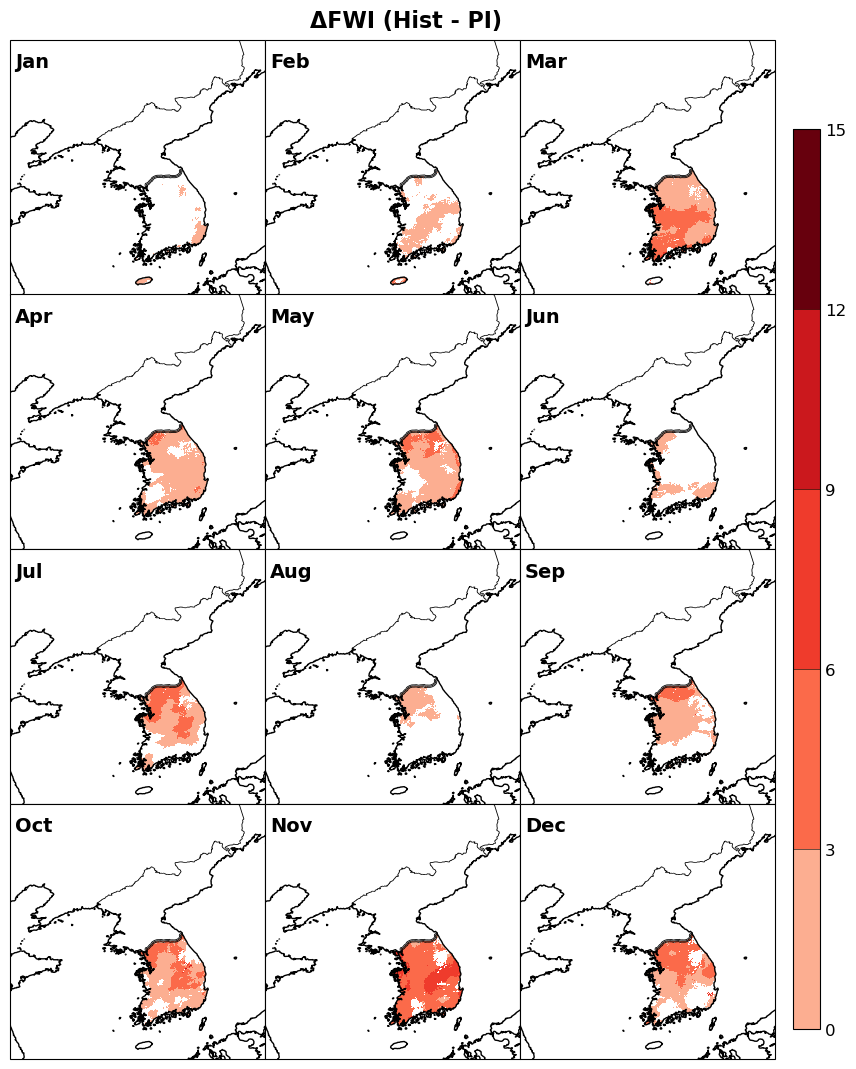

In [ ]:


hist_path = f"../result/HR/historical/all_gcm_fwi.nc"
pi_path = f"../result/HR/picontrol/all_gcm_fwi.nc"

shapefile_path = "./shape_files/ne_10m_admin_0_countries.shp"
gdf_borders = gpd.read_file(shapefile_path)
korea = gdf_borders[gdf_borders['SOVEREIGNT'].isin(['South Korea'])].geometry.unary_union

ds_hist = xr.open_dataset(hist_path)
ds_pi = xr.open_dataset(pi_path)

# üîπ ÏõîÎ≥Ñ ÏµúÎåÄÍ∞í Í≥ÑÏÇ∞
hist_monthly = ds_hist.FWI_all.groupby("time_mean.month").max(dim="time_mean")
pi_monthly = ds_pi.FWI_all.groupby("time_mean.month").max(dim="time_mean")

# üîπ ŒîFWI Í≥ÑÏÇ∞ (Historical - PI-Control)
delta_fwi = hist_monthly - pi_monthly

# üìå ÏÉâÏÉÅ Î∞è Í≤ΩÍ≥Ñ ÏÑ§Ï†ï
bounds = np.arange(0, 18, 3)  # -15ÏóêÏÑú 15ÍπåÏßÄ 3 Í∞ÑÍ≤©ÏúºÎ°ú ÏÑ§Ï†ï
colors = ["#fcae91", "#fb6a4a", "#ef3b2c", "#cb181d", "#67000d"]   # Îçî ÏßÑÌïú ÏÉâÏÉÅ
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# üìå ÏßÄÎèÑ ÏÑ§Ï†ï
fig, axes = plt.subplots(4, 3, figsize=(9, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0, right=0.85, top=1, bottom=0, hspace=-0.415, wspace=0)  # üîπ Ïó¨Î∞± ÏôÑÏ†Ñ Ï†úÍ±∞

month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

lon = np.load("../../data/ISIMIP_ko_lon_2km.npy")  # (601,)
lat = np.load("../../data/ISIMIP_ko_lat_2km.npy")  # (601,)

lon_grid, lat_grid = np.meshgrid(lon, lat)
mask = vectorized.contains(korea, lon_grid, lat_grid)

for i, ax in enumerate(axes.flat):
    if i < 12:  # 12Í∞úÏõîÍπåÏßÄÎßå Í∑∏Î¶¨Í∏∞
        delta_fwi[i] = np.where(mask, np.flipud(delta_fwi[i]), np.nan)
        delta_fwi[i] = np.where(delta_fwi[i]<0, np.nan, delta_fwi[i])
        c = ax.pcolormesh(ds_hist.lon, ds_hist.lat, delta_fwi[i], cmap=cmap, norm=norm, shading="auto")

        # üîπ ÏßÄÎèÑ Ïä§ÌÉÄÏùº Ï°∞Ï†ï
        ax.coastlines(color="black", linewidth=1.0)
        ax.add_feature(cfeature.BORDERS, linestyle="-", edgecolor="black", linewidth=0.6)
        # ax.contour(ds_hist.lon, ds_hist.lat, np.flipud(delta_fwi[i]), levels=bounds, colors='black', linewidths=0.5)

        # üîπ X, Y ÎùºÎ≤® Ï†úÍ±∞ÌïòÍ≥† Ïõî Ïù¥Î¶ÑÎßå ÎÇ®Í∏∞Í∏∞
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(0.02, 0.95, month_labels[i], transform=ax.transAxes, fontsize=14, fontweight="bold", va="top", ha="left")
    else:
        ax.axis("off")  # ÎÇ®ÏùÄ Îπà Í≥µÍ∞Ñ Ï†úÍ±∞

# üìå Ïª¨Îü¨Î∞î Ï∂îÍ∞Ä (Ïò§Î•∏Ï™Ω Î∞∞Ïπò)
cbar_ax = fig.add_axes([0.87, 0.1, 0.03, 0.75])  # (left, bottom, width, height)
cbar = fig.colorbar(c, cax=cbar_ax, orientation="vertical", ticks=bounds, drawedges=True)
# cbar.set_label("FWI diff", fontsize=14, fontweight="bold")

# üìå Ïª¨Îü¨Î∞î Ìè∞Ìä∏ ÌÅ¨Í∏∞ Î∞è ÎààÍ∏à Ï°∞Ï†ï
cbar.ax.tick_params(size=0, width=0, labelsize=12)
cbar.ax.yaxis.set_tick_params(width=1.5)

plt.suptitle("ŒîFWI (Hist - PI)", fontsize=16, fontweight="bold", x=0.44, y=0.95)

# üîπ Í≥†Ìï¥ÏÉÅÎèÑÎ°ú Ï†ÄÏû•
plt.savefig(f"./figs/delta_all_fwi_discrete.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_1742582/3219696852.py:45: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  korea = gdf_borders[gdf_borders['SOVEREIGNT'].isin(['South Korea'])].geometry.unary_union


Busan 2/27 -> 2/2
Chungcheongbuk-do 4/7 -> 3/25
Chungcheongnam-do 3/4 -> 3/22
Daegu 4/4 -> 3/25
Daejeon 4/15 -> 3/26
Gangwon-do 4/8 -> 4/10
Gwangju 4/15 -> 3/26
Gyeonggi-do 4/17 -> 4/9
Gyeongsangbuk-do 2/2 -> 2/2
Gyeongsangnam-do 2/27 -> 2/2
Incheon 3/24 -> 3/22
Jellanam-do 4/15 -> 3/4
Jeonbuk-do 3/4 -> 3/26
Sejong-si 4/15 -> 4/9
Seoul 4/17 -> 4/17
Ulsan 2/2 -> 2/1


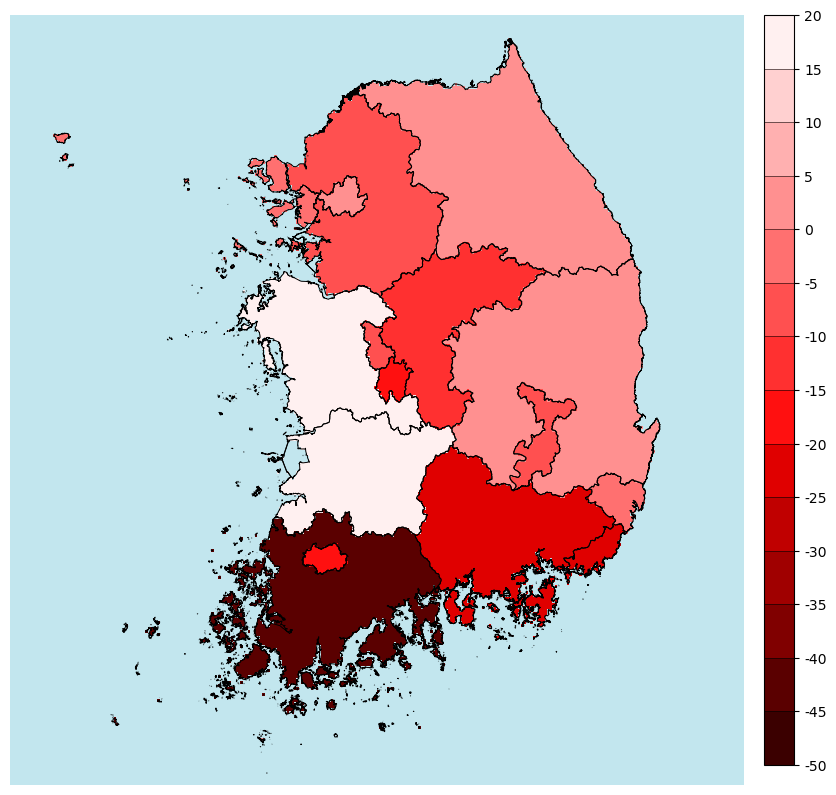

In [14]:

from PIL import Image
from matplotlib.colors import ListedColormap

def day_to_month_day(day_number):
    """
    1~365 ÏÇ¨Ïù¥Ïùò Ïà´ÏûêÎ•º Ïõî/ÏùºÎ°ú Î≥ÄÌôò (ÎπÑÏú§ÎÖÑ Í∏∞Ï§Ä)
    """
    if not 1 <= day_number <= 365:
        raise ValueError("day_numberÎäî 1~365 ÏÇ¨Ïù¥Ïó¨Ïïº Ìï©ÎãàÎã§.")
    
    month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    cumulative_days = 0
    
    for month, days_in_month in enumerate(month_days, start=1):
        if day_number <= cumulative_days + days_in_month:
            day = day_number - cumulative_days
            return month, str(day)
        cumulative_days += days_in_month

Sido = Image.open('../../data/sido_total.png')

sido_name = [
    "",
    "Busan",
    "Chungcheongbuk-do",
    "Chungcheongnam-do",
    "Daegu",
    "Daejeon",
    "Gangwon-do",
    "Gwangju",
    "Gyeonggi-do",
    "Gyeongsangbuk-do",
    "Gyeongsangnam-do",
    "Incheon",
    "Jeju-do",
    "Jellanam-do",
    "Jeonbuk-do",
    "Sejong-si",
    "Seoul",
    "Ulsan",
]

shapefile_path = "./shape_files/ne_10m_admin_0_countries.shp"
gdf_borders = gpd.read_file(shapefile_path)
korea = gdf_borders[gdf_borders['SOVEREIGNT'].isin(['South Korea'])].geometry.unary_union

lon = np.load("../../data/ISIMIP_ko_lon_2km.npy")  # (601,)
lat = np.load("../../data/ISIMIP_ko_lat_2km.npy")  # (601,)

lon_grid, lat_grid = np.meshgrid(lon, lat)
ko_mask = vectorized.contains(korea, lon_grid, lat_grid)

aa_hist = np.load("../result/HR/historical/all_gcm_fwi.npy")  # (365, 5, 601, 601)

hist_mask = aa_hist > 20
hist_first_valid_idx = np.argmax(hist_mask, axis=0)
all_false = ~np.any(hist_mask, axis=0)
hist_first_valid_idx[all_false] = 99999

aa_pi = np.load("../result/HR/picontrol/all_gcm_fwi.npy")  # (365, 5, 601, 601)

pi_mask = aa_pi > 20
pi_first_valid_idx = np.argmax(pi_mask, axis=0)
all_false = ~np.any(pi_mask, axis=0)
pi_first_valid_idx[all_false] = 99999

temp_data = {}
sido_array = np.array(Sido.getdata())[:,0]

# np.save("./sido_array.npy", sido_array)
for sido in sido_name:
    # print(sido)
    temp_data[sido] = [99999, 99999, 99999] # hist first, pi first, hist-pi

hist_1d = hist_first_valid_idx.reshape(-1)
pi_1d = pi_first_valid_idx.reshape(-1)

for d in range(len(hist_1d)):
    sido_idx = sido_array[d]
    if hist_1d[d] != 99999:
        if sido_idx > 0 and sido_idx <= len(sido_name):
            temp_data[sido_name[sido_idx]][0] = hist_1d[d] if temp_data[sido_name[sido_idx]][0] > hist_1d[d] else temp_data[sido_name[sido_idx]][0]
    if pi_1d[d] != 99999:
        if sido_idx > 0 and sido_idx <= len(sido_name):
            temp_data[sido_name[sido_idx]][1] = pi_1d[d] if temp_data[sido_name[sido_idx]][1] > pi_1d[d] else temp_data[sido_name[sido_idx]][1]

for sido in sido_name:
    temp_data[sido][2] = temp_data[sido][0] - temp_data[sido][1]

for sido in sido_name:
    if temp_data[sido][0] != 99999:
        pi_mon, pi_day = day_to_month_day(temp_data[sido][1]+1)
        hist_mon, hist_day = day_to_month_day(temp_data[sido][0]+1)
        print(sido, f"{pi_mon}/{pi_day} -> {hist_mon}/{hist_day}")
# sido_value_map = {i: temp_data.get(name, np.nan) for i, name in enumerate(sido_name)}

sido_value_map = {i: temp_data[name][2] for i, name in enumerate(sido_name)}

sido_array = np.array(sido_array).reshape(601,601)
# (601, 601) ÏãúÎèÑÎ≥Ñ Í∞í Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
value_image = np.full_like(hist_first_valid_idx, fill_value=np.nan, dtype=float)
for i in range(601):
    for j in range(601):
        sido_idx = sido_array[i, j]
        if sido_idx in sido_value_map:
            value_image[i, j] = sido_value_map[sido_idx]

# Ï¢åÌëú Ï†ïÎ≥¥ Î∂àÎü¨Ïò§Í∏∞
lon = np.load("../../data/ISIMIP_ko_lon_2km.npy")  # (601,)
lat = np.load("../../data/ISIMIP_ko_lat_2km.npy")  # (601,)
lon_grid, lat_grid = np.meshgrid(lon, lat)

mask = sido_array > 0

# 3. value_imageÏóê ÎßàÏä§ÌÅ¨ Ï†ÅÏö©
value_image = np.where(mask, value_image, np.nan)

shapefile_path = "./shape_files/ctprvn.shp"
sido_gdf = gpd.read_file(shapefile_path)
sido_gdf.set_crs(epsg=5179, inplace=True)  # Ï¢åÌëúÍ≥Ñ ÏÑ§Ï†ï (metadataÎßå ÏÑ§Ï†ï)

# EPSG:4326 (WGS84 ÏúÑÍ≤ΩÎèÑ)Î°ú Î≥ÄÌôò
sido_gdf = sido_gdf.to_crs(epsg=4326)
bounds = np.arange(-50, 21, 5)  # [-50, -45, ..., 20]


pink_cmap = ListedColormap([
    "#fff0f0", "#ffd0d0", "#ffb0b0", "#ff9090", "#ff7070", "#ff5050", "#ff3030", 
    "#ff1010", "#e00000", "#c00000", "#a00000", "#800000", "#5a0000", "#3b0000"][::-1]
    )

# boundsÎäî ÏúÑÎûë ÎèôÏùº
norm = mcolors.BoundaryNorm(bounds, len(pink_cmap.colors))

# 2. ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

sido_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.7)

cf = ax.pcolormesh(
    lon[200:-100], lat[45:-300],
    np.flipud(value_image)[45:-300, 200:-100],
    cmap=pink_cmap,
    norm=norm,
    shading='auto'
)

ax.set_extent([
    lon[200], lon[-100],
    lat[45], lat[-300]
], crs=ccrs.PlateCarree())
ax.set_facecolor('#C2E6EE')
for spine in ax.spines.values():
    spine.set_visible(False)

# 3. Ïª¨Îü¨Î∞î - boundaries ÏßÄÏ†ïÌï¥ÏÑú tick ÎßûÏ∂îÍ∏∞
cbar_ax = fig.add_axes([0.9, 0.13, 0.03, 0.75])  # (left, bottom, width, height)
cbar = fig.colorbar(cf, cax=cbar_ax, orientation="vertical", ticks=bounds, drawedges=True)
cbar.ax.set_yticklabels([f'{int(b)}' for b in bounds])  # ÎùºÎ≤® Ï†ïÎ¶¨
# plt.suptitle("FWI>20 First day", fontsize=16, fontweight="bold")
plt.savefig("./figs/delta_first_day.png", dpi=300, bbox_inches="tight")
plt.show()